## Parametriranje PID regulatora Ziegler Nichols metodom ruba stabilnosti

In [1]:
# priprema okruženja
%matplotlib widget
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import control
import ipywidgets as ipw

In [2]:
# model procesa kojeg reguliramo
def create_model():
    return control.tf([1], [1, 3, 3, 1])       # model procesa kojim se upravlja

Gp = create_model()
print("Gp =")
Gp

Gp =


TransferFunction(array([1]), array([1, 3, 3, 1]))

In [3]:
# modeli kontrolera
def P_regulator(Kp):
    return control.tf([Kp], [1])

def PI_regulator(Kp, Ti):
    return control.tf([Kp*Ti, Kp], [Ti, 0])

def PID_regulator(Kp, Ti, Td):
    return control.tf([Kp*Ti*Td, Kp*Ti, Kp], [Ti, 0])

In [4]:
# zatvoreni sustav

# Potrebno je povećavati pojačanje P-regulatora sve dok odziv ne dođe do ruba stabilnosti
Gr = P_regulator(Kp=8)
Gz = control.feedback(Gr*Gp)

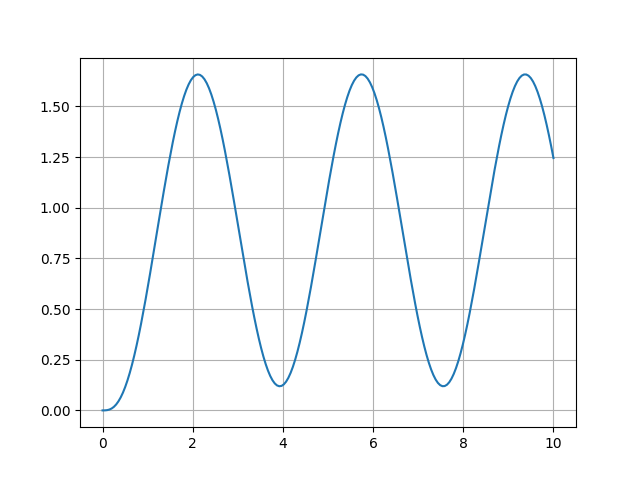

In [5]:
T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gz, T)
# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv sustava s P regulatorom na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()

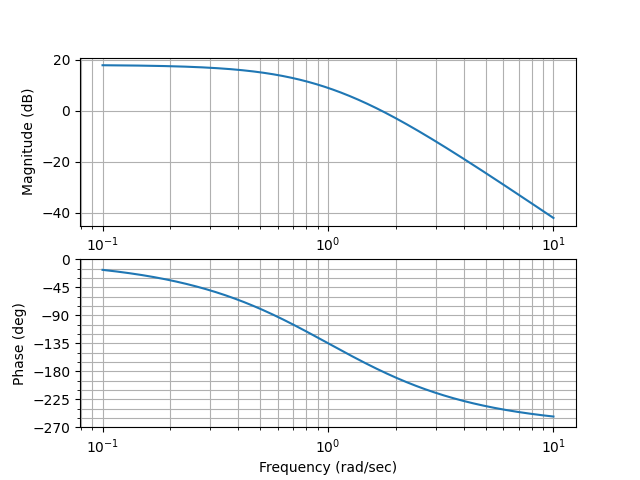

In [6]:
fig = plt.figure()
bode=control.bode(Gr*Gp, dB=True)

interactive(children=(FloatSlider(value=0.1, continuous_update=False, description='Kp', max=10.0, min=0.1), Ou…

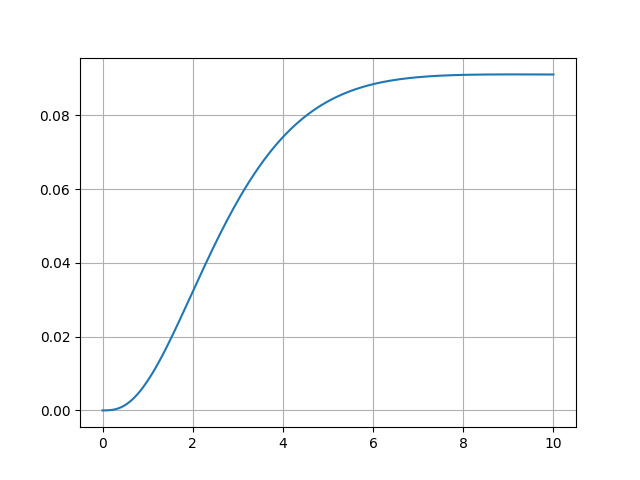

In [11]:
#interaktivni prikaz
t = np.linspace(0, 10, 200)

def f(t, Kp):
    Gp = create_model()
    Gr=Kp
    
    Gz = control.feedback(Gr*Gp)
    tout, yout = control.step_response(Gz, t)
    return yout

fig = plt.figure()
fig.set_label('Odziv prijenosne funkcije na skokovitu pobudu')
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(t, f(t, 1))
plt.grid()

def update(Kp = 1):
    line.set_ydata(f(t,Kp))
    ax.relim()
    ax.autoscale_view(True,True,True)
    
    fig.canvas.draw_idle()
    
ipw.interact(update, Kp=ipw.FloatSlider(min=0.1, max=10.0, step=0.1, continuous_update=False));

In [12]:
# Parametriranje PID po Ziegler - Nicholsu

# Vrijednosti koje smo dobili iz dijagrama gore
Kpkr = 8.0
Tkr = 3.6

# Računamo PID regulator po parametrima iz tablice
Kr = 0.6*Kpkr
Ti = 0.5*Tkr
Td = 0.12*Tkr

Gr = PID_regulator(Kr, Ti , Td)

#Gr = PI_regulator(0.45*Kpkr, 0.85*Tkr)

print("Kr={:.1f}\nTi={:.1f}\nTd={:.1f}".format(Kr, Ti, Td))

Kr=4.8
Ti=1.8
Td=0.4


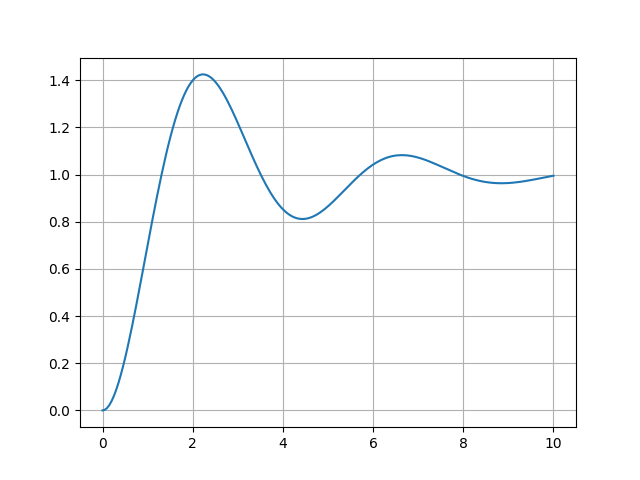

In [14]:
Gz = control.feedback(Gr*Gp)

T = np.linspace(0, 10, 200)
tout,yout = control.step_response(Gz, T)
# vremenski odziv
fig = plt.figure()
fig.set_label('Odziv prijenosne funkcije na skokovitu pobudu')

plt.plot(tout,yout)
plt.grid()
plt.show()